In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

In [ ]:
ma_100_days = data.Close.rolling(100).mean()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

In [ ]:
data_test.shape[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 279ms/step - loss: 0.0783
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 258ms/step - loss: 0.0061
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0052
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - loss: 0.0043
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - loss: 0.0043
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - loss: 0.0048
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - loss: 0.0037
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - loss: 0.0039
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - loss: 0.0041
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - loss: 0.0035
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - loss: 0.0034
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - loss: 0.0036
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step


In [30]:
scale =1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [34]:
y = y*scale

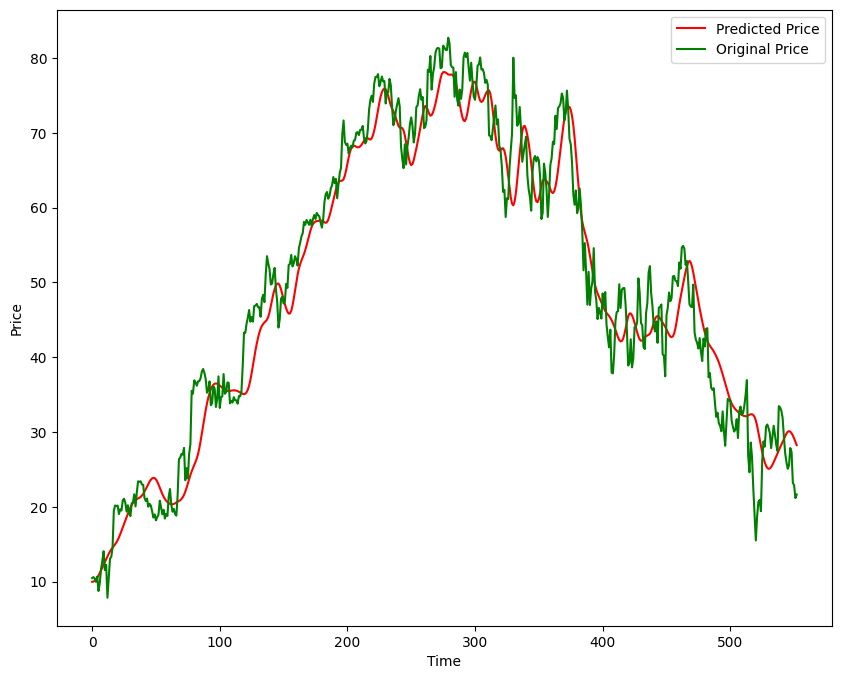

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Predictions Model.keras')

In [52]:
! pip install prophet

## Using Prophet model

[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbtyq56_v/fsy9kjjk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbtyq56_v/yzc96pyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76737', 'data', 'file=/tmp/tmpbtyq56_v/fsy9kjjk.json', 'init=/tmp/tmpbtyq56_v/yzc96pyi.json', 'output', 'file=/tmp/tmpbtyq56_v/prophet_modelube9hylm/prophet_model-20240821155951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


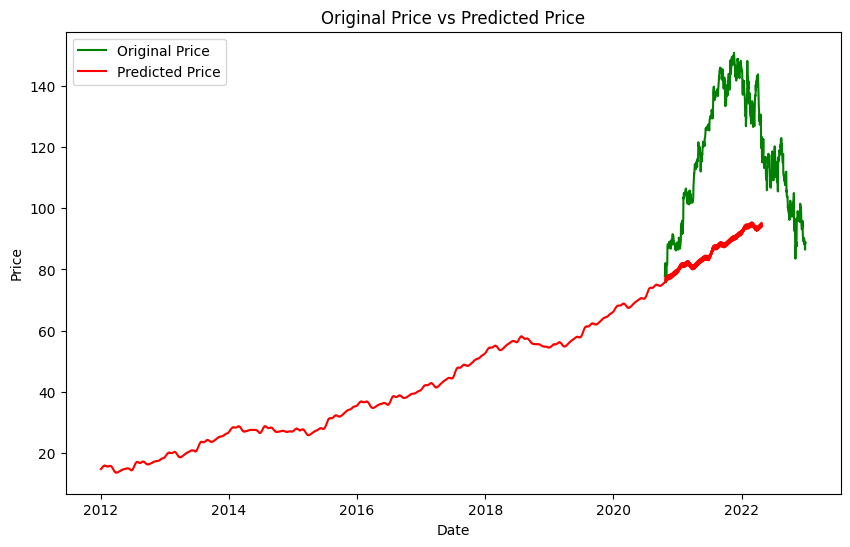

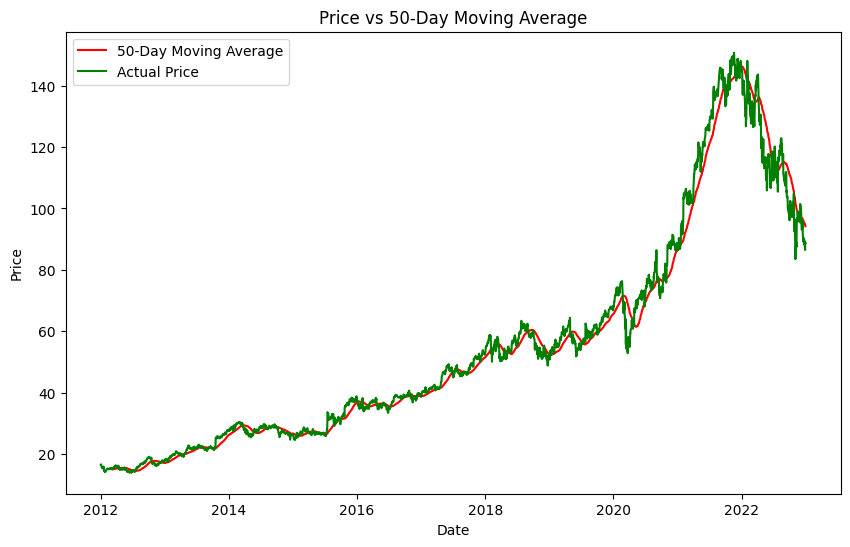

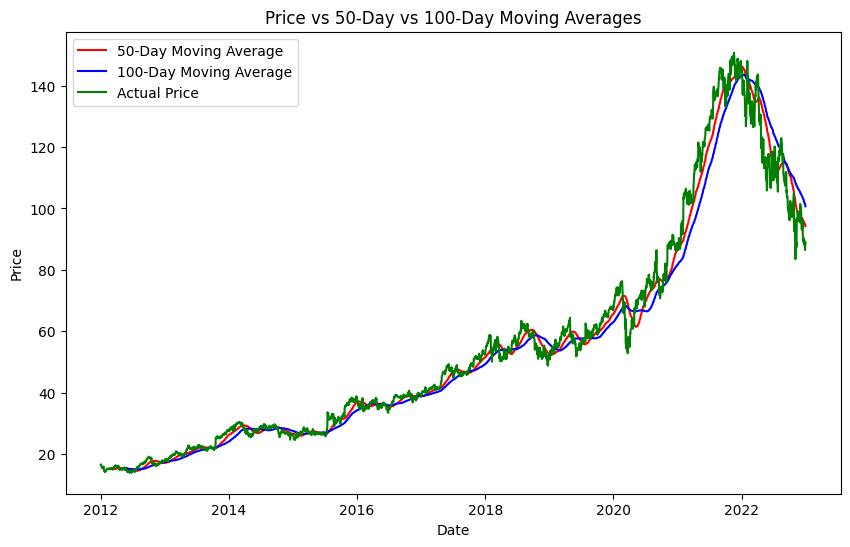

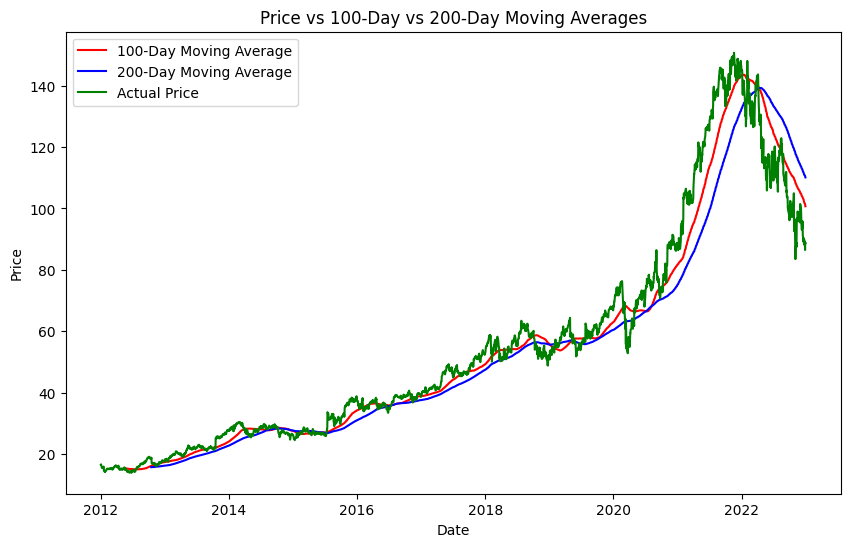

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

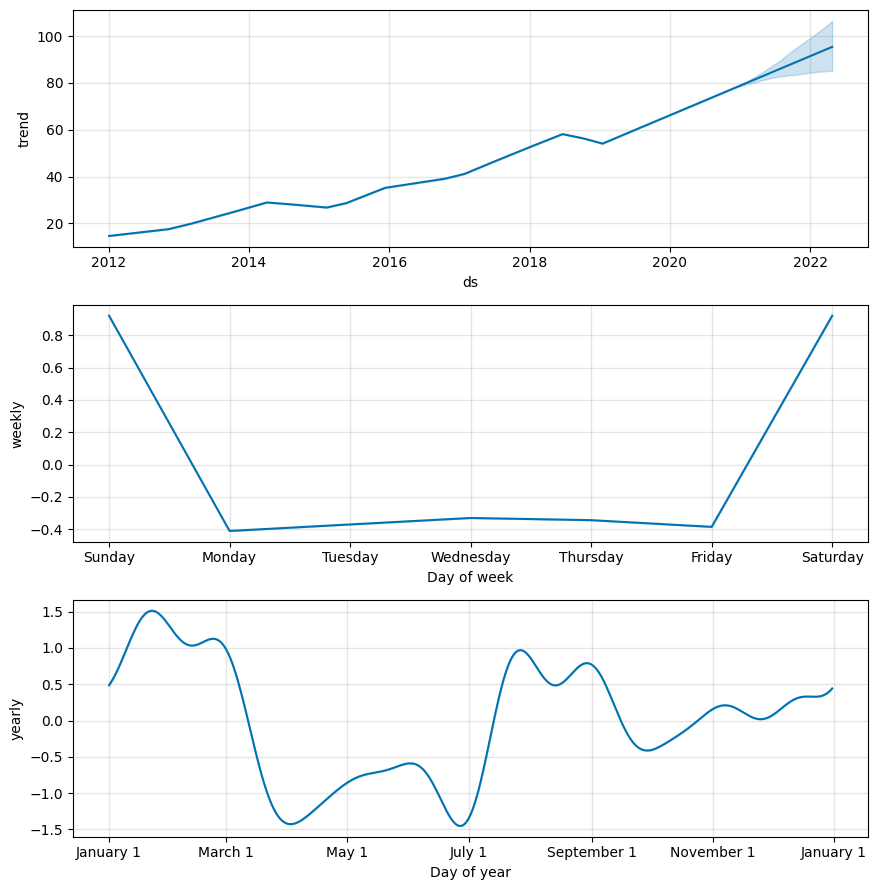

In [53]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

# Define the stock symbol and date range
stock = 'GOOG'
start = '2012-01-01'
end = '2022-12-31'

# Download stock data
data = yf.download(stock, start, end)

# Display the first few rows of the dataset
data.head()

# Prepare data for Prophet
df = data[['Close']].reset_index()
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Display the first few rows of the prepared dataset
df.head()

# Split the data into training and testing sets
train_data = df.iloc[:int(len(df) * 0.80)]
test_data = df.iloc[int(len(df) * 0.80):]

# Initialize and train the Prophet model
model = Prophet()
model.fit(train_data)

# Make predictions
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Display the forecast DataFrame
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plotting the forecast vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], 'g', label='Original Price')
plt.plot(forecast['ds'], forecast['yhat'], 'r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Original Price vs Predicted Price')
plt.show()

# Plot 50-day moving average
ma_50_days = data.Close.rolling(50).mean()
plt.figure(figsize=(10, 6))
plt.plot(ma_50_days, 'r', label='50-Day Moving Average')
plt.plot(data.Close, 'g', label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs 50-Day Moving Average')
plt.legend()
plt.show()

# Plot 50-day vs 100-day moving average
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(10, 6))
plt.plot(ma_50_days, 'r', label='50-Day Moving Average')
plt.plot(ma_100_days, 'b', label='100-Day Moving Average')
plt.plot(data.Close, 'g', label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs 50-Day vs 100-Day Moving Averages')
plt.legend()
plt.show()

# Plot 100-day vs 200-day moving average
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(10, 6))
plt.plot(ma_100_days, 'r', label='100-Day Moving Average')
plt.plot(ma_200_days, 'b', label='200-Day Moving Average')
plt.plot(data.Close, 'g', label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs 100-Day vs 200-Day Moving Averages')
plt.legend()
plt.show()

# Plot the forecast components
model.plot_components(forecast)
plt.show()
